In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Updload dataset and visualize first 5 rows
raw_data = pd.read_csv('Traffic.csv')
raw_data.head(5)

,Year,Area,Date,Road,Kilometer Point,Municipality Name,County Name,Province Name,Fatalties,Serious Injuries,...,Road Surface Conditions,Type of Road,Road Ownership,Road's Altimetric Layout,Wind Conditions,Day of the Week Grouping,Hour of Day,Time of Day Grouping,Type of Accident,Day Type
0,2010,Zona urbana,25/01/2010,SE,999999.0,CANOVES I SAMALUS,Valles Oriental,Barcelona,0,1,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",Feiners,23.33,Nit,Col.lisió de vehicles en marxa,dill-dij
1,2010,Carretera,31/10/2010,N-240,99.9,LLEIDA,Segria,Lleida,0,1,...,Sec i net,Carretera convencional,Estatal,Pla,"Calma, vent molt suau",CapDeSetmana,1.00,Nit,Sortida de la calcada sense especificar,dg
2,2010,Carretera,17/05/2010,N-II,708.7,FORNELLS DE LA SELVA,Girones,Girona,1,0,...,Sec i net,Carretera convencional,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,15.27,Tarda,Col.lisió de vehicles en marxa,dill-dij
3,2010,Zona urbana,21/08/2010,SE,999999.0,BARCELONA,Barcelones,Barcelona,0,2,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,22.30,Nit,Col.lisió de vehicles en marxa,dis
4,2010,Zona urbana,07/05/2010,SE,999999.0,BADALONA,Barcelones,Barcelona,0,1,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,17.45,Tarda,Bolcada a la calcada,div


In [13]:
# Analize content as nans, cols info

columns_name = raw_data.columns.values

print(f'The columns from the Traffic dataset are {columns_name}')

raw_data.info()

The columns from the Traffic dataset are ['Year' 'Area' 'Date ' 'Road ' 'Kilometer Point' 'Municipality Name '
 'County Name ' 'Province Name ' 'Fatalties' 'Serious Injuries '
 'Light Injuries ' 'Total Victims ' 'Units Involved '
 'Pedestrains Involved' 'Bicycles Involved' 'Mopeds Involved'
 'Motorcycles' 'Light Vehicles Involved ' 'Heavy Vehicles Involved'
 'Other Units Involved' 'Unspecified Units Involved' 'Road Speed Limit'
 'Accident with Hit and Run' 'Fog Presence ' 'Surrounding Environment'
 'Special Lane Presence' 'Special Traffic Measures' 'Weather Conditions '
 'Special Road Functions ' 'Severity of Accident ' 'Influence of Fog '
 'Influence of Environment' 'Influence of Traffic' 'Influence of Weather'
 'Influence of Wind Intensity ' 'Influence of Lighting'
 'Influence of Special Measures' 'Influence of Road Objects'
 'Influence of Road Surface ' 'Influence of Visibility '
 'Intersection Characteristics ' 'Speed Limit Information'
 'Lighting Conditions ' 'Traffic Regulation a

In [22]:
# General Trends
# What are the overall trends in traffic accidents, fatalities, and serious injuries in Catalonia from 2010-2021?

# Columns Names that we will use: 'Year', 'Fatalties', 'Serious Injuries ', 'Light Injuries ', 'Total Victims '

accidents = raw_data[['Year','Fatalties', 'Serious Injuries ', 'Light Injuries ', 'Total Victims ']].groupby('Year').sum()

accidents.head(5)

,Fatalties,Serious Injuries,Light Injuries,Total Victims
Year,,,,
2010,339,2007,883,3229
2011,280,1866,757,2903
2012,274,1980,879,3133
2013,232,1901,752,2885
2014,230,1888,760,2878


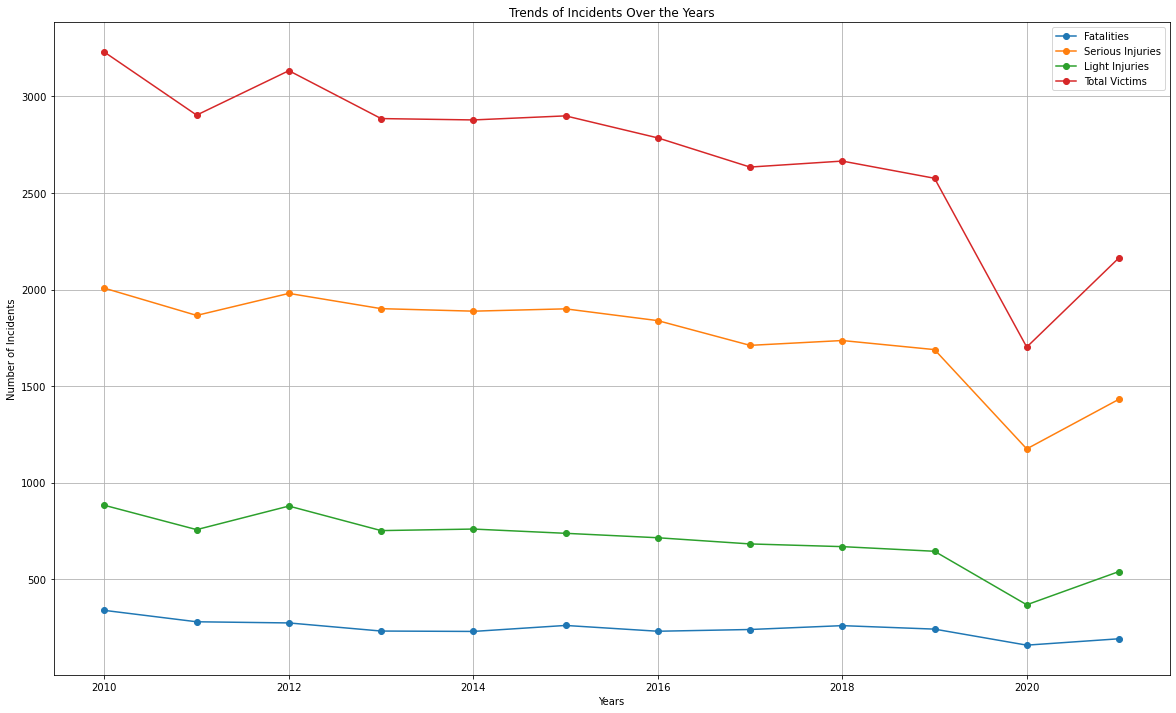

In [25]:
plt.figure(figsize=(20, 12))  # Adjust the figure size as needed

# Plotting each trend
plt.plot(accidents.index, accidents['Fatalties'], label='Fatalities', marker='o')
plt.plot(accidents.index, accidents['Serious Injuries '], label='Serious Injuries', marker='o')
plt.plot(accidents.index, accidents['Light Injuries '], label='Light Injuries', marker='o')
plt.plot(accidents.index, accidents['Total Victims '], label='Total Victims', marker='o')

# Adding labels and title
plt.xlabel('Years')
plt.ylabel('Number of Incidents')
plt.title('Trends of Incidents Over the Years')

# Adding legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [26]:
"""
The trends in traffic accidents, fatalities, and serious injuries in Catalonia from 2010 to 2021 
indicate a consistent overall downward trajectory, suggesting improvements in road safety measures
or changes in driving behavior. Notably, the year 2020 stands out with a significant decrease, 
attributed to the impact of the COVID-19 pandemic and associated quarantine measures. Fatalities 
exhibit a more linear decline, possibly influenced by advancements in car safety systems. However, 
the slower decrease in fatalities compared to other indicators hints at a shift, where incidents that
might have resulted in fatalities are now being categorized as injuries, reflecting the evolution of 
safety technology. Overall, the data underscores positive advancements in road safety, though the exceptional
circumstances of 2020 should be considered when assessing the trends.
"""

'\n\nThe trends in traffic accidents, fatalities, and serious injuries in Catalonia from 2010 to 2021 \nindicate a consistent overall downward trajectory, suggesting improvements in road safety measures\nor changes in driving behavior. Notably, the year 2020 stands out with a significant decrease, \nattributed to the impact of the COVID-19 pandemic and associated quarantine measures. Fatalities \nexhibit a more linear decline, possibly influenced by advancements in car safety systems. However, \nthe slower decrease in fatalities compared to other indicators hints at a shift, where incidents that\nmight have resulted in fatalities are now being categorized as injuries, reflecting the evolution of \nsafety technology. Overall, the data underscores positive advancements in road safety, though the exceptional\ncircumstances of 2020 should be considered when assessing the trends.\n'

In [31]:
# Accidents Characteristics
# What common characteristics (time of day, type of road, etc.) are observed in the most severe accidents?

# We assume that the most severe accidents are those ones where the Severity shows fatality, since
# a fatality might be considered the worst outcome from an accident

most_severe_accidents = raw_data[raw_data['Severity of Accident '] == 'Accident mortal']
most_severe_accidents.head(3)

,Year,Area,Date,Road,Kilometer Point,Municipality Name,County Name,Province Name,Fatalties,Serious Injuries,...,Road Surface Conditions,Type of Road,Road Ownership,Road's Altimetric Layout,Wind Conditions,Day of the Week Grouping,Hour of Day,Time of Day Grouping,Type of Accident,Day Type
2,2010,Carretera,17/05/2010,N-II,708.7,FORNELLS DE LA SELVA,Girones,Girona,1,0,...,Sec i net,Carretera convencional,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,15.27,Tarda,Col.lisió de vehicles en marxa,dill-dij
7,2010,Zona urbana,23/10/2010,SE,999999.0,BARCELONA,Barcelones,Barcelona,1,0,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,10.55,Matí,Atropellament,dis
18,2010,Zona urbana,02/07/2010,SE,999999.0,BARCELONA,Barcelones,Barcelona,1,0,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,16.40,Tarda,Atropellament,div
